In [93]:
from scipy.stats import chi2
from scipy.stats import gamma
from scipy.stats import norm
from scipy.stats import skewnorm
from scipy.stats import lognorm
from scipy.stats import halfnorm
from scipy.stats import crystalball
from scipy.stats import laplace_asymmetric
from scipy.stats import halfcauchy

In [94]:
def laplace_asymmetricfit(args, x):
#     df = args
    Amp, kappa, loc, scale, b = args
#     print(df)
    rv = laplace_asymmetric(kappa = kappa, loc = loc, scale = scale)
    return Amp*rv.pdf(x) + b

In [95]:
def lstsq_laplace_asymmetricfit(args, x, y):
#     print(args, x, y)
    return laplace_asymmetricfit(args, x) - y

In [96]:
def skewnormfit(args, x):
#     df = args
    Amp, a, loc, scale, b, c, d = args
#     print(df)
    rv = skewnorm(a = a, loc = loc, scale = scale)
    return Amp*rv.pdf(x) + b + c*x + d*x*x

In [97]:
def lstsq_skewnormfit(args, x, y):
#     print(args, x, y)
    return skewnormfit(args, x) - y

In [98]:
def skewnormfit2(args, x):
#     df = args
    a, loc, scale, b, c, d = args
#     print(df)
    rv = skewnorm(a = a, loc = loc, scale = scale)
    return Amp*rv.pdf(x) + b + c*x + d*x*x

In [99]:
def lstsq_skewnormfit2(args, x, y):
#     print(args, x, y)
    return skewnormfit2(args, x) - y

In [8]:
def lognormfit(args, x):
#     df = args
    Amp, s, loc, scale, b, c = args
#     print(df)
    rv = lognorm(s = s, loc = loc, scale = scale)
    return Amp*rv.pdf(x) + b + c*x

In [9]:
def lstsq_lognormfit(args, x, y):
#     print(args, x, y)
    return lognormfit(args, x) - y

In [10]:
def normfit(args, x):
#     df = args
    Amp, loc, scale, a, b, c = args
#     print(df)
    rv = norm(loc = loc, scale = scale)
    return Amp*rv.pdf(x) + a + b*x +c*x*x

In [11]:
def lstsq_normfit(args, x, y):
#     print(args, x, y)
    return normfit(args, x) - y

In [12]:
def normfit2(args, x):
#     df = args
    Amp, loc, scale, a, b, c, d = args
#     print(df)
    rv = norm(loc = loc, scale = scale)
    return Amp*rv.pdf(x) + a + b*x + c*x*x + d*x*x*x

In [13]:
def lstsq_normfit2(args, x, y):
#     print(args, x, y)
    return normfit2(args, x) - y

In [14]:
def halfnormfit(args, x):
#     df = args
    Amp, scale, a, b, c = args
#     print(df)
    rv = halfnorm(scale = scale)
    return Amp*rv.pdf(x) + a + b*x + c*x*x

In [15]:
def lstsq_halfnormfit(args, x, y):
#     print(args, x, y)
    return halfnormfit(args, x) - y

In [16]:
def halfnormfit2(args, x):
#     df = args
    Amp, scale, a, b = args
#     print(df)
    rv = halfnorm(scale = scale)
    return Amp*rv.pdf(x) + a + b*x

In [17]:
def lstsq_halfnormfit2(args, x, y):
#     print(args, x, y)
    return halfnormfit2(args, x) - y

In [18]:
def halfcauchyfit(args, x):
#     df = args
    Amp, scale, a, b, c = args
#     print(df)
    rv = halfcauchy(scale = scale)
    return Amp*rv.pdf(x) + a + b*x + c*x*x

In [19]:
def lstsq_halfcauchyfit(args, x, y):
#     print(args, x, y)
    return halfcauchyfit(args, x) - y

In [20]:
def probFit(dist, bins, fit, res_lsq, hist = None, unchist = None):
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    if hist is None:
        hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    if unchist is None:
        unchist = np.sqrt(dist)/np.sum(dist)/np.diff(bincenters)[0]
    chi2fit = np.sum((hist - fit)**2/unchist**2)
    dof = len(hist) - len(res_lsq.x)
    pvalue = 1-chi2.cdf(chi2fit, dof)
    return pvalue, chi2fit, dof

In [21]:
from utils.epg import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares

In [22]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [23]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 22,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}",     # xcolor for colours
		"figure.autolayout": True
}
matplotlib.rcParams.update(pgf_with_latex)

def nphistmean(hist, bins):
    s=0
    for i in range(len(hist)):
        s += hist[i] * ((bins[i] + bins[i+1]) / 2) 
    mean = s / np.sum(hist)
    return mean

In [24]:
def extendedBins(bins, left, right):
    binwidth = np.diff(bins)[0]
    leftbins = bins[0] - (np.linspace(1, left+1, left+1)*binwidth)[::-1]
    rightbins = np.linspace(1, right+1, right +1)*binwidth + bins[-1]
    return np.array([*leftbins, *bins, *rightbins])

## Inbending DVCS

In [25]:
parent_epg = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4.2/inb/epg/"
epg_4397 = pd.read_pickle(parent_epg + "4397" + "_epg.pkl")
epg_4076 = pd.read_pickle(parent_epg + "4076" + "_epg.pkl")

In [26]:
dvcsSimInb = epg_4397
bkgSimInb = epg_4076

In [27]:
dvcsSimInb = dvcsSimInb.loc[dvcsSimInb.Ge>2]
bkgSimInb = bkgSimInb.loc[bkgSimInb.Ge>2]

## CD cuts

In [100]:
dvcsSimInbCD = dvcsSimInb.loc[dvcsSimInb.config == 2]
bkgSimInbCD = bkgSimInb.loc[bkgSimInb.config == 2]

In [101]:
contInbCDFT = .0040597266707579184
contInbCD = 0.13554782386935704
contInbFD = 0.3804839519140771
contOutbCDFT = 0.005652963491001403
contOutbCD = 0.21805902894791315
contOutbFD = 0.5115950737954632

In [102]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD.MM2_ep, bins = np.linspace(-0.4, 0.4, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD.MM2_ep, bins = np.linspace(-0.4, 0.4, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params = [1, 0, 0.3, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD.MM2_ep, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD.MM2_ep, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 4*scale
        ub_opt = loc + 4*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.0 642.4152463670914 94
0.09639456217436682 112.26513649710924 94
[ 2.42531757e-01  1.26223409e-02  7.96769048e-02  1.97041392e+00
  1.38072002e+00 -1.73110563e+01] -0.15101401562310218 0.1762586973868111 0.09639456217436682
0.0408938977193547 119.15829713600188 94
0.4230931290459474 96.00810788570526 94
[0.6241855  0.01139772 0.09316897 1.4583775  1.22072465 8.15205045] -0.17994794194467892 0.20274338683500803 0.4230931290459474
0.5579420309972267 91.3581157923441 94
[ 2.50718777e-01  1.21510729e-02  7.82672026e-02  2.19509306e+00
  1.56657418e+00 -1.99082711e+01] -0.14859010908003714 0.17289225495061988 0.5579420309972267
0.16916175376873033 107.02600571023036 94
0.6499092255023622 88.17449417092581 94
[ 0.66907811  0.01105443  0.09433282  1.36977316  1.2496864  10.93620661] -0.18268150915478923 0.20479036399964398 0.6499092255023622
0.42902631024290694 95.79770053464168 94
0.18942800775286128 105.8716786772528 94
0.4516111586625201 95.00432281903137 94


In [103]:
len(dvcsSimInbCD)

606846

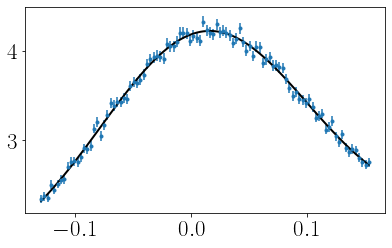

In [104]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [105]:
print(lb_opt, ub_opt)

-0.3662768725710367 0.3883857274158915


In [106]:
dvcsSimInbCD = dvcsSimInbCD.loc[(dvcsSimInbCD.MM2_ep<0.388)&(dvcsSimInbCD.MM2_ep>-0.366)]
bkgSimInbCD = bkgSimInbCD.loc[(bkgSimInbCD.MM2_ep<0.388)&(bkgSimInbCD.MM2_ep>-0.366)]

In [107]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD.MM2_eg, bins = np.linspace(-0.5, 2.5, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD.MM2_eg, bins = np.linspace(-0.5, 2.5, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params = [1, 0.908, 0.244, -0.471, 0.526, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD.MM2_eg, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD.MM2_eg, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 4*scale
        ub_opt = loc + 4*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.0 3261.7478621220916 94
0.41668929551134937 96.23624912856283 94
[ 0.32288774  0.97946658  0.32176757  0.04556879  0.75755787 -0.32383092] 0.3186367774815919 1.6402963782468416 0.41668929551134937
0.5062461342935859 93.12054986065478 94
[ 0.28524057  0.97737158  0.29969641 -0.00584713  1.1105081  -0.48432254] 0.3618704012775861 1.5928727667287315 0.5062461342935859
0.7918602307097422 82.67036308912422 94
[ 0.23719224  0.97801855  0.28158077 -0.06398626  1.39731091 -0.62549765] 0.3997223552150265 1.5563147382294928 0.7918602307097422
0.39244159408802537 97.11113950648209 94
0.4817546296603261 93.96027420695256 94
0.7567870240215792 84.1505597721853 94
0.7200409600136495 85.59890639714237 94
0.9064121330318953 76.46412944099907 94
[ 0.22542769  0.97677673  0.27431861 -0.10163142  1.58141424 -0.71116168] 0.4133951879320539 1.540158265706626 0.9064121330318953
0.82507351234715 81.1444805488369 94


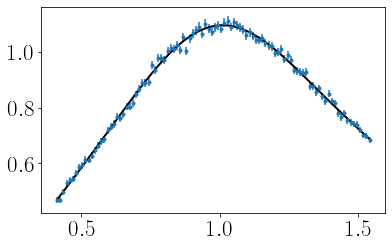

In [108]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [109]:
print(lb_opt, ub_opt)

-0.12049769844419478 2.0740511520828746


In [110]:
dvcsSimInbCD = dvcsSimInbCD.loc[(dvcsSimInbCD.MM2_eg<2.074)&(dvcsSimInbCD.MM2_eg>-0.120)]
bkgSimInbCD = bkgSimInbCD.loc[(bkgSimInbCD.MM2_eg<2.074)&(bkgSimInbCD.MM2_eg>-0.120)]

In [111]:
len(dvcsSimInbCD)

415396

In [112]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD.ME_epg, bins = np.linspace(-0.422, 0.466, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD.ME_epg, bins = np.linspace(-0.422, 0.466, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params = [1, 0.1, 0.14, -0.471, 0.526, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD.ME_epg, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD.ME_epg, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 4*scale
        ub_opt = loc + 4*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.4881791312104361 93.73941545661332 94
[ 0.36924022  0.0785567   0.23289795  0.81758297  0.53768371 -1.39796533] -0.399757221983512 0.5568706176483604 0.4881791312104361
0.7233168182814838 85.4731991219518 94
[ 0.3059623   0.07230544  0.22274845  0.81445551  0.52313569 -1.45428534] -0.3851639464531979 0.5297748253126675 0.7233168182814838
0.7465820110971022 84.56184229891221 94
[ 0.41029356  0.07323208  0.23923457  0.71543325  0.47830159 -1.07291303] -0.4180956552003681 0.5645598204909297 0.7465820110971022
0.6577999160246409 87.89361346588657 94
0.3512568963972481 98.64688288441596 94
0.4740926219444944 94.22434719197804 94
0.22721457944734147 103.92466528568126 94
0.6403089352330877 88.5139508702365 94
0.7536988879358576 84.27583160661902 94
[ 0.34163581  0.07248332  0.22946849  0.7723326   0.50432966 -1.30238395] -0.3987873352099963 0.5437539790617989 0.7536988879358576
0.23865034181070477 103.37714995394212 94


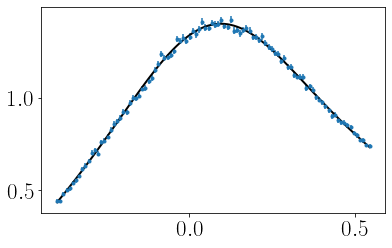

In [113]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [114]:
print(lb_opt, ub_opt)

-0.8453906298434299 0.9903572736952326


In [115]:
dvcsSimInbCD = dvcsSimInbCD.loc[(dvcsSimInbCD.ME_epg<0.990)&(dvcsSimInbCD.ME_epg>-0.845)]
bkgSimInbCD = bkgSimInbCD.loc[(bkgSimInbCD.ME_epg<0.990)&(bkgSimInbCD.ME_epg>-0.845)]

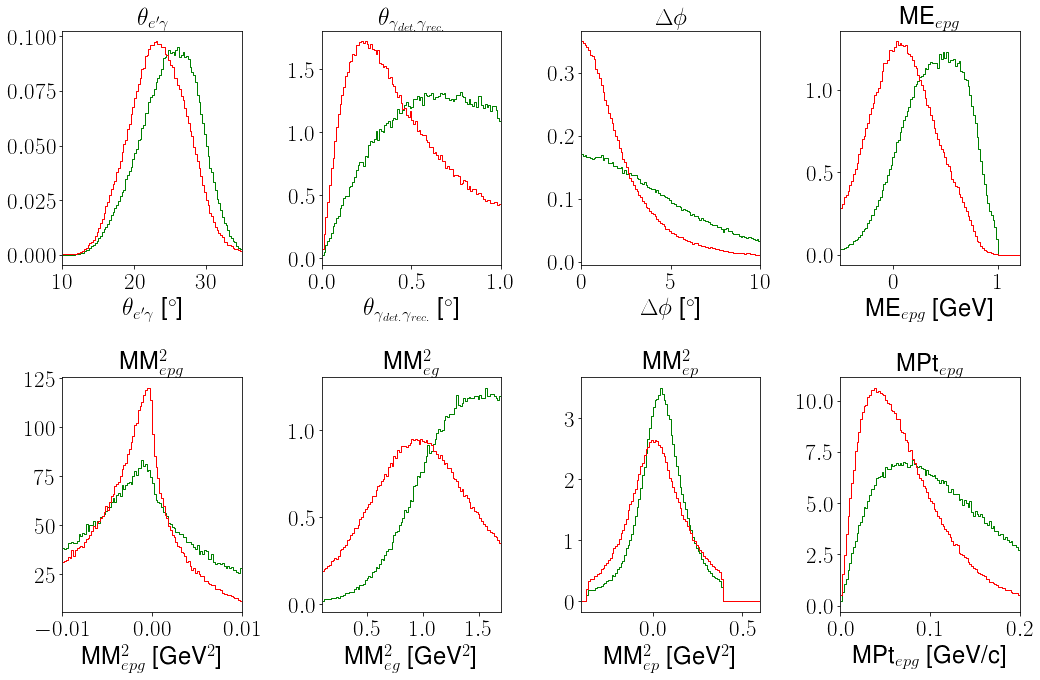

<Figure size 432x288 with 0 Axes>

In [116]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='g', linewidth=1)
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [117]:
pvalue_opt = -0.1
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD.coplanarity, bins = np.linspace(0, 10, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD.coplanarity, bins = np.linspace(0, 10, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params =[1, 0.8, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD.coplanarity, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD.coplanarity, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_halfnormfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp,  scale, a, b, c  = params
#     lb = min(halfnorm.ppf(0.1, loc = loc, scale = scale), -0.01)
#     ub = max(halfnorm.ppf(0.9, loc = loc, scale = scale), 0.003)
    lb = 0#min(halfnorm.ppf(0, a=a, loc = loc, scale = scale), -0.003)
    ub = 9#max(halfnorm.ppf(0.9, scale = scale), 0.002)
    pvalue, chi2fit, dof = probFit(simDist, bins,  halfnormfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0#halfnorm.ppf(0, a=a, loc = loc, scale = scale)
        ub_opt = 4*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

6.9216518113757175e-06 167.19705855350085 95
[ 3.29048717e-01  1.63410944e+00  1.70972577e-01 -3.11977366e-02
  1.56337610e-03] 0 9 6.9216518113757175e-06
3.185836002894682e-06 170.55317791049868 95
3.185836002894682e-06 170.55317791049868 95
3.185836002894682e-06 170.55317791049868 95
3.185836002894682e-06 170.55317791049868 95
3.185836002894682e-06 170.55317791049868 95
3.185836002894682e-06 170.55317791049868 95
3.185836002894682e-06 170.55317791049868 95
3.185836002894682e-06 170.55317791049868 95
3.185836002894682e-06 170.55317791049868 95


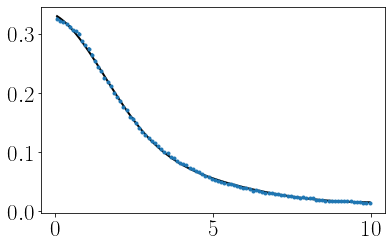

In [118]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
# plt.plot(bincenters_opt, skewnormfit([0.6, -2, 0, 0.003, 0, 0, 0], bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.plot(bincenters_opt, halfnormfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [119]:
print(ub_opt)

6.536437776944826


In [120]:
dvcsSimInbCD = dvcsSimInbCD.loc[(dvcsSimInbCD.coplanarity<6.536)]
bkgSimInbCD = bkgSimInbCD.loc[(bkgSimInbCD.coplanarity<6.536)]

In [121]:
def lstsq_normfit3(args, x, y):
#     print(args, x, y)
    return normfit3(args, x) - y
def normfit3(args, x):
#     df = args
    loc, scale, a, b = args
#     print(df)
    rv = norm(loc = loc, scale = scale)
    return rv.pdf(x) + a + b*x

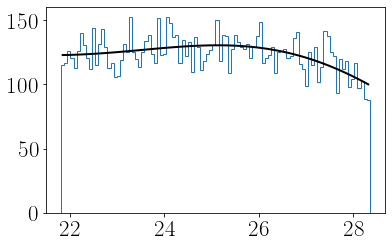

3.0 [ 2.71077828e+01  3.57228642e+00  4.37781775e-01 -1.48101754e-02] 0.2206739160994048
27.107782841190748 16.390923589248633 28.42112816706299


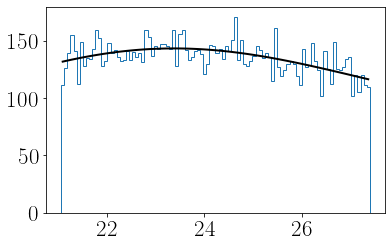

3.5 [2.30382960e+01 4.20491864e+00 3.02801797e-02 1.81329647e-03] 0.6370158438715756
23.038296016884388 10.423540104788529 23.12913655592339


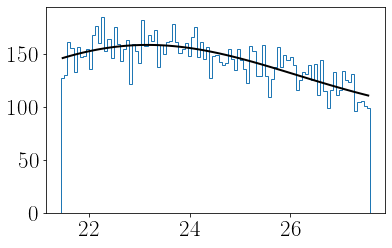

4.0 [ 2.27398547e+01  3.38740418e+00 -3.66264848e-02  4.35670606e-03] 0.051528846711523246
22.73985472709534 12.577642200307054 22.629975272750816


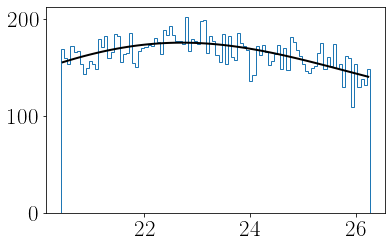

4.5 [ 2.22631208e+01  3.58653354e+00 -1.48522847e-02  3.83856701e-03] 0.3427266647253182
22.263120847155424 11.5035202369045 22.218563993068003


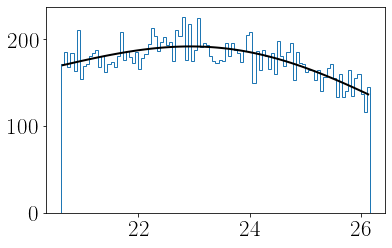

5.0 [ 2.36403099e+01  3.20487871e+00  2.65514286e-01 -8.36705683e-03] 0.1722738115071829
23.640309929710707 14.025673799664926 24.436852788716966


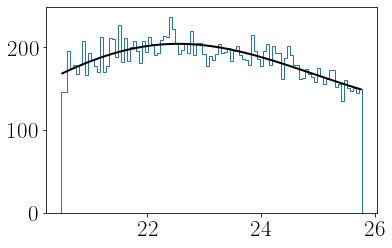

5.5 [ 2.21332279e+01  2.78579384e+00 -1.04661184e-01  7.55668913e-03] 0.7668079838042059
22.133227905153667 13.775846395317064 21.819244353196805


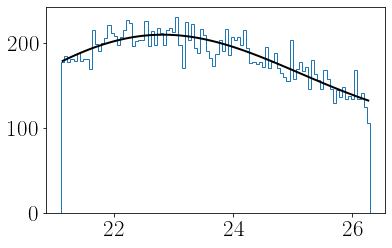

6.0 [ 2.25808534e+01  2.53744764e+00 -7.20824417e-02  5.93077470e-03] 0.563632637107107
22.580853432680335 14.968510525982774 22.364606107554806


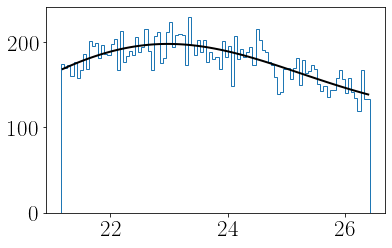

6.5 [ 2.25512251e+01  2.69791828e+00 -1.33073130e-01  8.60845252e-03] 0.044552579597229136
22.55122510879891 14.457470275466402 22.152005717637916


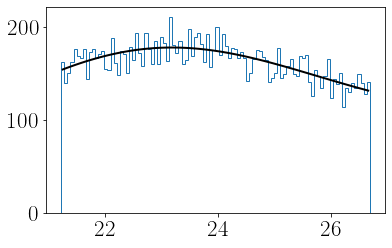

7.0 [ 2.27375054e+01  2.99729993e+00 -8.48630127e-02  6.60731988e-03] 0.2687970535879822
22.737505388471188 13.745605609002858 22.482916350505285


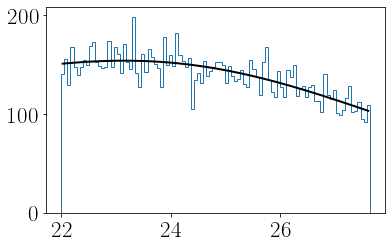

7.5 [ 2.41359545e+01  3.76482866e+00  2.58145338e-01 -7.09952817e-03] 0.02369348213948219
24.135954546276533 12.84146856878487 24.910390559804405


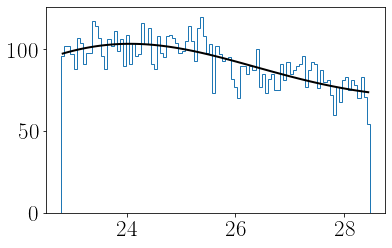

8.0 [ 2.34009431e+01  2.96731318e+00 -1.69403024e-01  9.78505549e-03] 0.6488690135036117
23.400943088827667 14.49900353801965 22.892734018211463


In [122]:
GpEdges = np.linspace(3, 8.5, 12)
GeEdges = GpEdges
GpArray = []
lbs = []
ubs = []
for i in range(len(GpEdges)-1):
    GpMin = GpEdges[i]
    GpMax = GpEdges[i+1]
    var = dvcsSimInbCD.loc[(dvcsSimInbCD.Gp>GpMin)&(dvcsSimInbCD.Gp<GpMax), "coneAngle"]
    hist, bins = np.histogram(var, bins = 100)
    mu = bins[np.argmax(hist)]
    sigma = var.std()
    
    bins = np.linspace(mu-0.5*sigma, mu+1*sigma, 101)
#     if i >3:
#         bins = np.linspace(mu-sigma, mu+0.8*sigma, 101)

    
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist, bins = np.histogram(var, bins = bins)
    dist = hist/np.sum(hist)/np.diff(bins)[0]
    unchist = np.sqrt(hist)
    uncdist = unchist/np.sum(hist)/np.diff(bins)[0]
    params = [mu, sigma, 0, 0]
    res_lsq = least_squares(lstsq_normfit3, params, args=(bincenters, dist))
    plt.hist(var, bins = bins, histtype = 'step')
    
    plt.plot(bincenters, normfit3(res_lsq.x, bincenters)*np.sum(hist)*np.diff(bincenters)[0], 'k-', lw=2, label='frozen pdf')
    plt.show()
    chi2fit = np.sum((hist - normfit3(res_lsq.x, bincenters)*np.sum(hist)*np.diff(bincenters)[0])**2/unchist**2)
    dof = len(hist) - len(res_lsq.x)
    pvalue = 1-chi2.cdf(chi2fit, dof)
    print(GpMin, res_lsq.x ,pvalue)
    print(res_lsq.x[0], res_lsq.x[0]-3*res_lsq.x[1], res_lsq.x[0]+3*res_lsq.x[2])
    GpArray.append((GpMin + GpMax)/2)
    lbs.append(res_lsq.x[0]-4*res_lsq.x[1])
    ubs.append(res_lsq.x[0]+4*res_lsq.x[1])

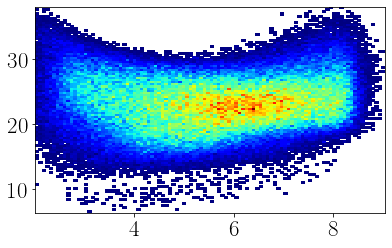

In [69]:
plt.hist2d(dvcsSimInbCD.Ge, dvcsSimInbCD.coneAngle, bins = 100, cmin = 1, cmap = cmap)
plt.show()

In [70]:
def lstsq_polyfit(args, x, y):
    x = np.array(x)
    return np.poly1d(args)(x) - y

[  0.83039139 -10.42649483  66.70842112]
[-6.45884123e-04  3.52281141e-01  8.31576922e+00]


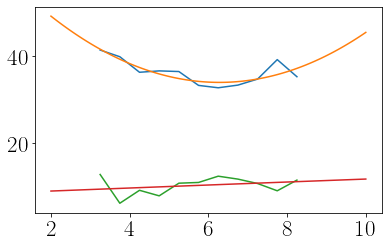

In [124]:
plt.plot((GeEdges[1:]+GeEdges[:-1])/2, ubs)
res_lsq = least_squares(lstsq_polyfit, [0, 0, 0], args=((GeEdges[1:]+GeEdges[:-1])/2, ubs))
plt.plot(np.linspace(2, 10, 101), np.poly1d([0.830, -10.426, 66.708])(np.linspace(2, 10, 101)))
print(res_lsq.x)
plt.plot((GeEdges[1:]+GeEdges[:-1])/2, lbs)
res_lsq = least_squares(lstsq_polyfit, [0, 0, 0], args=((GeEdges[1:]+GeEdges[:-1])/2, lbs))
plt.plot(np.linspace(2, 10, 101), np.poly1d([-0.000646, 0.352, 8.316])(np.linspace(2, 10, 101)))
print(res_lsq.x)


In [125]:
dvcsSimInbCD = dvcsSimInbCD.loc[(dvcsSimInbCD.coneAngle<np.poly1d([0.830, -10.426, 66.708])(dvcsSimInbCD.Gp))&(dvcsSimInbCD.coneAngle>np.poly1d([-0.000646, 0.352, 8.316])(dvcsSimInbCD.Gp))]
bkgSimInbCD = bkgSimInbCD.loc[(bkgSimInbCD.coneAngle<np.poly1d([0.830, -10.426, 66.708])(bkgSimInbCD.Gp))&(bkgSimInbCD.coneAngle>np.poly1d([-0.000646, 0.352, 8.316])(bkgSimInbCD.Gp))]

In [126]:
len(dvcsSimInbCD)

360990

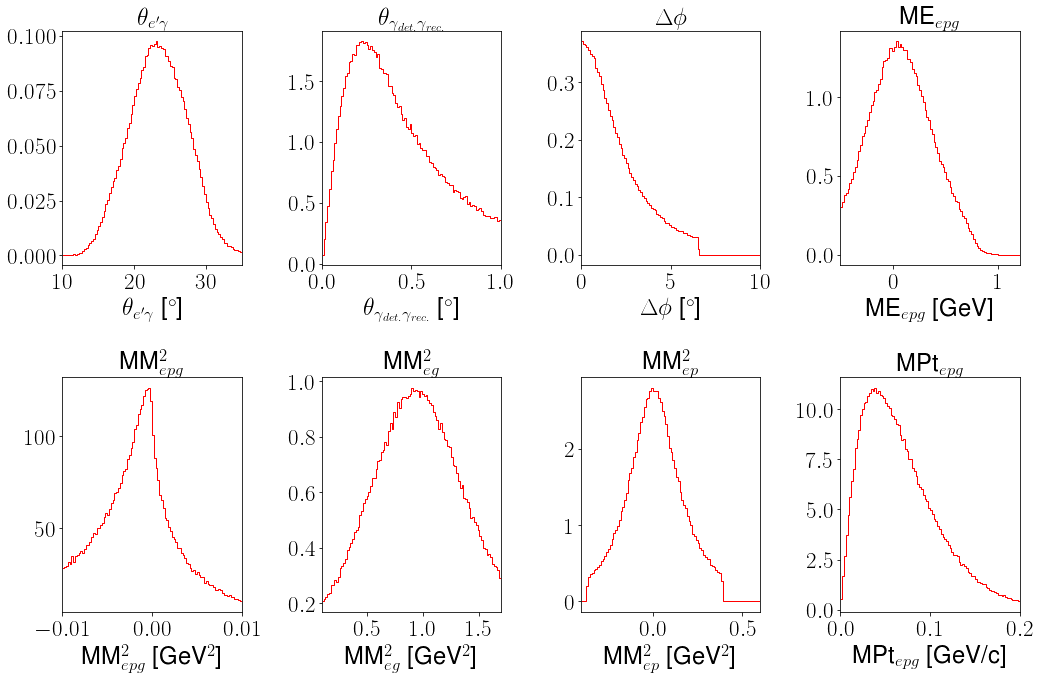

<Figure size 432x288 with 0 Axes>

In [127]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [128]:
pvalue_opt = -0.1
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD.MPt, bins = np.linspace(0.005, 0.08, 21))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD.MPt, bins = np.linspace(0.005, 0.08, 21))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params =[1, 0.01, 0.05, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD.MPt, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD.MPt, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = 0.005#min(halfnorm.ppf(0, a=a, loc = loc, scale = scale), -0.003)
    ub = max(norm.ppf(0.9, loc = loc, scale = scale), 0.08)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0#halfnorm.ppf(0, a=a, loc = loc, scale = scale)
        ub_opt = loc+4*scale#norm.ppf(1-0.0013, loc = loc, scale = scale)
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.7578900167615514 10.058554954188487 14
[ 9.94949163e-01  1.68482874e-02  2.87460413e-02 -1.19536174e+01
  6.24176197e+02 -4.31704428e+03] 0.005 0.08 0.7578900167615514
0.8022351814563398 82.20876827238932 94
[ 6.48646641e-01  1.81481073e-02  2.50939456e-02 -8.24141818e+00
  6.22395227e+02 -4.77835620e+03] 0.005 0.08 0.8022351814563398
0.8022352197716555 82.20876654446533 94
[ 6.48641341e-01  1.81481556e-02  2.50938808e-02 -8.24134840e+00
  6.22394586e+02 -4.77835803e+03] 0.005 0.08 0.8022352197716555
0.8022352489420884 82.20876522895234 94
[ 6.48640129e-01  1.81481690e-02  2.50938663e-02 -8.24133147e+00
  6.22394377e+02 -4.77835782e+03] 0.005 0.08 0.8022352489420884
0.8022352489420884 82.20876522895234 94
0.8022352489420884 82.20876522895234 94
0.8022352489420884 82.20876522895234 94
0.8022352489420884 82.20876522895234 94
0.8022352489420884 82.20876522895234 94
0.8022352489420884 82.20876522895234 94


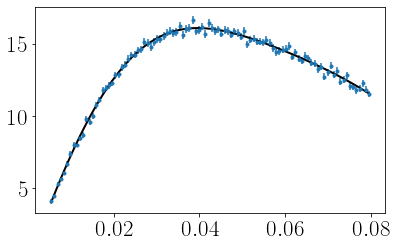

In [129]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [130]:
params_opt

array([ 6.48640129e-01,  1.81481690e-02,  2.50938663e-02, -8.24133147e+00,
        6.22394377e+02, -4.77835782e+03])

In [131]:
print(ub_opt)

0.11852363425678047


In [132]:
dvcsSimInbCD = dvcsSimInbCD.loc[(dvcsSimInbCD.MPt<0.119)]
bkgSimInbCD = bkgSimInbCD.loc[(bkgSimInbCD.MPt<0.119)]

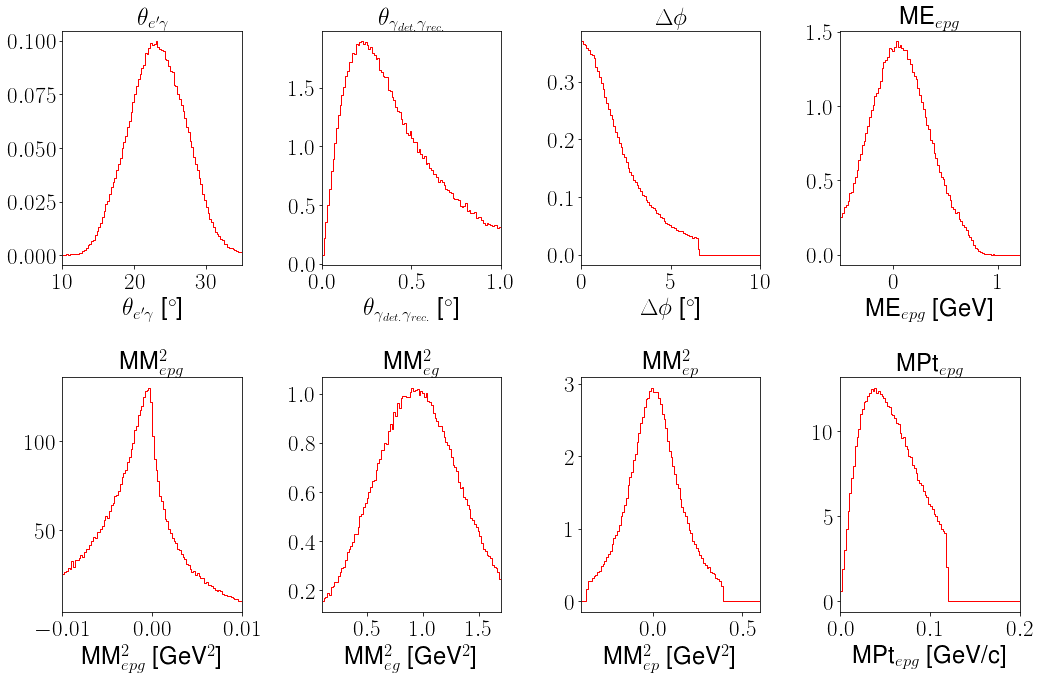

<Figure size 432x288 with 0 Axes>

In [133]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [134]:
pvalue_opt = -0.1
for i in range(0, 1):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD.reconGam, bins = np.linspace(0.005, 0.6, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD.reconGam, bins = np.linspace(0.005, 0.6, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params =[1, 0.01, 0.3, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD.reconGam, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD.reconGam, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = 0.005#min(halfnorm.ppf(0, a=a, loc = loc, scale = scale), -0.003)
    ub = max(norm.ppf(0.9, loc = loc, scale = scale), 0.6)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0#halfnorm.ppf(0, a=a, loc = loc, scale = scale)
        ub_opt = loc+4*scale
#         print(ub_opt, loc + 4*scale)
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.4808652385991845 93.99088817151168 94
[  1.53324782   0.12242595   0.2054415   -2.52934882  11.91375417
 -10.02915556] 0.005 0.6 0.4808652385991845


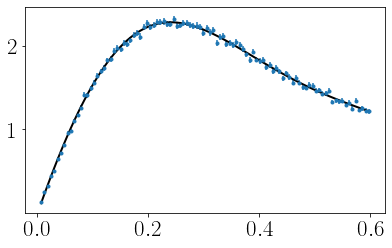

In [135]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [136]:
print(ub_opt)

0.9441919624829583


In [137]:
dvcsSimInbCD = dvcsSimInbCD.loc[dvcsSimInbCD.reconGam<0.944]
bkgSimInbCD = bkgSimInbCD.loc[bkgSimInbCD.reconGam<0.944]

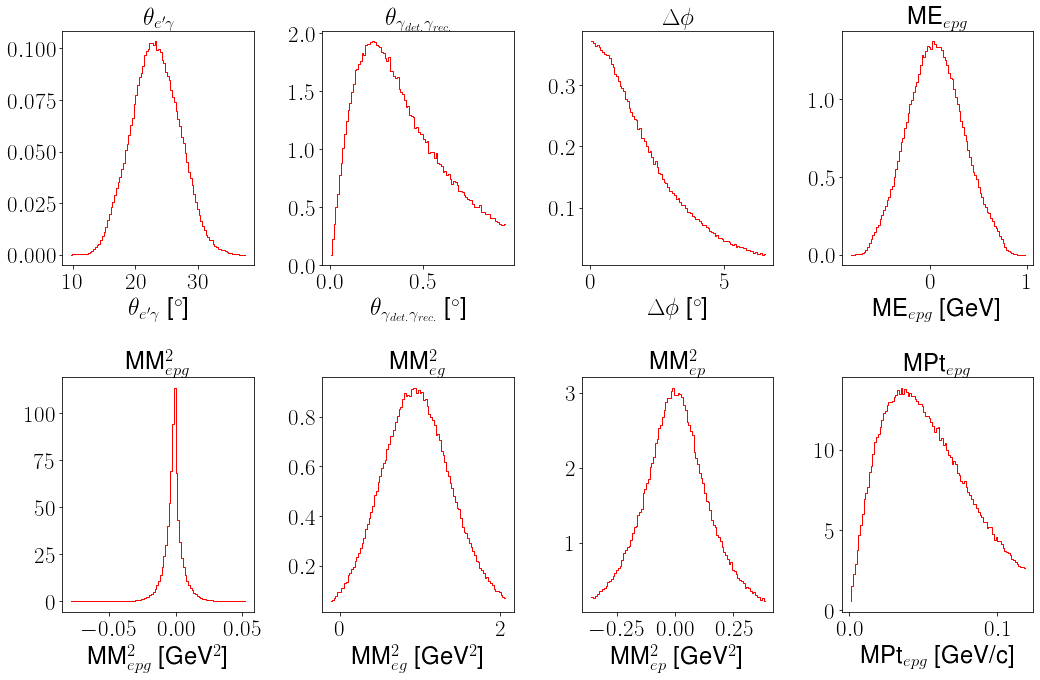

<Figure size 432x288 with 0 Axes>

In [138]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [92]:
len(dvcsSimInbCD)

135031

In [139]:
print(dvcsSimInbCD.MM2_epg.mean()+4*dvcsSimInbCD.MM2_epg.std(), dvcsSimInbCD.MM2_epg.mean()-4*dvcsSimInbCD.MM2_epg.std())

0.027039211189739627 -0.03026582678863217
